In [2]:
!pip install matplotlib
!pip install opencv-python
!pip install notebook
!pip install pyserial
!pip install mediapipe

  Using cached mediapipe-0.10.21-cp311-cp311-macosx_11_0_universal2.whl.metadata (9.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached protobuf-4.25.6-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl.metadata (1.4 kB)
  Using cached sentencepiece-0.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (21 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached scipy-1.15.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
Using cached mediapipe-0.10.21-cp311-cp311-macosx_11_0_universal2.whl (49.2 MB)
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
Using cached pro

Objetivos da aula:

- Conhecer o que é uma imagem digital
- Conhecer como fazer leitura e exibição de imagens
- conhecer algumas propriedades de imagens
- conhecer canais de cores de imagens

  
## *Representação e visualização de imagem*

Uma imagem digital nada mais é que uma uma matriz de linhas e colunas, onde cada posição desta matriz contem o valor de um pixel.

O valor de cada pixel representa a intensidade de cor naquele ponto especifico.

OpenCv (cv2) ---> principal biblioteca de processamento de imagem

Numpy ---> tudo dentro dessa biblioteca é um vetor


In [8]:
# Importando a biblioteca OpenCV
import cv2

#import a biblioteca Numpy8 bits
import numpy as np

#linha magica para imprimir graficos no notebook
%matplotlib inline
from matplotlib import pyplot as plt


print ("OpenCV Versão : %s " % cv2.__version__)

OpenCV Versão : 4.11.0 


In [37]:
# Para facilitar o download das imagens utilizadas neste notebook

!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/NATUREZA_1.jpg" /content # este link é o local onde a imagem está salva
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/img3x3.png" /content


--2025-02-18 16:38:06--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/NATUREZA_1.jpg
185.199.109.133, 185.199.110.133, 185.199.111.133, ...ntent.com)... 
conectado.-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 233789 (228K) [image/jpeg]
Salvando em: “NATUREZA_1.jpg”

NATUREZA_1.jpg      100%[===================>] 228,31K   541KB/s    em 0,4s    

2025-02-18 16:38:07 (541 KB/s) - “NATUREZA_1.jpg” salvo [233789/233789]

Prepended http:// to '/content'
http:///content: O nome de máquina é inválido.
FINALIZADO --2025-02-18 16:38:07--
Tempo total decorrido: 1,4s
Baixados: 1 arquivos, 228K em 0,4s (541 KB/s)
--2025-02-18 16:38:07--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/img3x3.png
185.199.110.133, 185.199.111.133, 185.199.108.133, ...ntent.com)... 
conectado.-se a raw.githubuserc

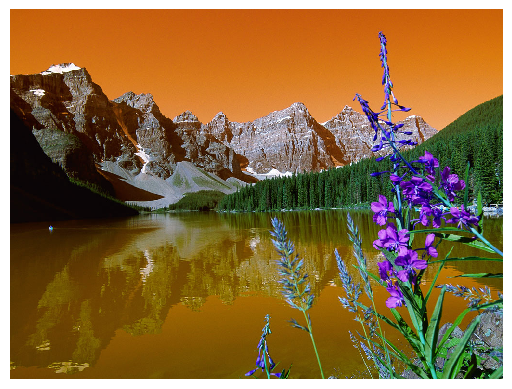

In [54]:
# Imagem carregada em bgr
# para nao imprimir os eixos
image = cv2.imread("Aula 1302/NATUREZA_1.jpg") #carregou a imagem em memória

plt.imshow(image,interpolation="none")
plt.axis('off')
plt.show()

A imagem colorida possui três dimensões: as linhas e as colunas da matriz, bem como os canais da imagem. **Uma imagem colorida geralmente possui três canais: R (Red - vermelho) G (Green - verde) B (Blue - azul)**

Mas porque a imagem é mostrada de modo estranho pelo pacote matplotlib? Porque a OpenCV representa os canais da imagem na ordem B - G - R, e não R - G - B como é esperado pela maior parte das bibliotecas.

**Assim, para podermos visualizar corretamente uma imagem do OpenCV com matplotlib, precisamos inverter os canais, como no código abaixo:**

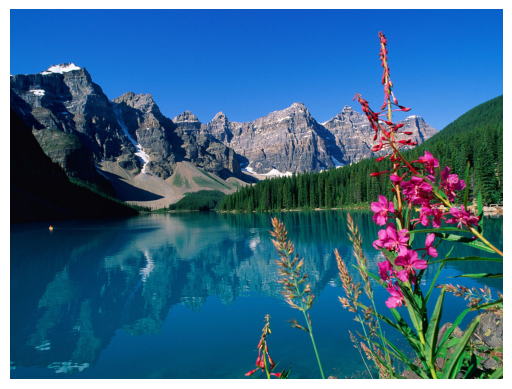

In [24]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #pega a matriz e o cvs.color converte de bgr para rgb (pq a biblioteca que carregamos não trabalha com o padrão rgb e sim bgr, aí ele faz essa conversão já que pra plotar ele plota com rbg)

plt.imshow(image_rgb)

plt.axis('off') #o plt.axis('off') mostra a imagem sem as réguas de medida pelas bordas
plt.show()


In [19]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: ", image_rgb.shape) #método shape --> atributos da imagem, devolve uma dupla com 3 argumentos. (dupla-item imutável); devolve: Dimensões da imagem:  (768, 1024, 3)
#|_ primeiro argumento = altura, 2° = largura, 3° = quantos canais de cores a imagem tem (neste caso 3 --> rgb)
print("Quantidade de linhas: ", image_rgb.shape[0])
print("Quantidade de colunas: ", image_rgb.shape[1])
print("Camadas de cores: ", image_rgb.shape[2])

Dimensões da imagem:  (768, 1024, 3)
Quantidade de linhas:  768
Quantidade de colunas:  1024
Camadas de cores:  3


In [21]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: \n", image_rgb) #cada linha representa um pixel da matriz

Dimensões da imagem: 
 [[[ 10  92 194]
  [ 12  94 196]
  [ 12  95 197]
  ...
  [  6  98 201]
  [  5  97 200]
  [  2  95 198]]

 [[ 11  93 195]
  [ 11  94 196]
  [ 11  94 196]
  ...
  [  6  98 201]
  [  6  98 201]
  [  4  97 200]]

 [[ 11  94 196]
  [ 11  94 196]
  [  9  95 196]
  ...
  [  5  97 200]
  [  7  99 202]
  [  7 100 203]]

 ...

 [[  0  69 111]
  [  1  70 112]
  [  1  70 112]
  ...
  [ 11  31   6]
  [ 17  41  17]
  [  6  34   9]]

 [[  0  67 109]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 65 105  68]
  [ 86 135  90]
  [ 82 136  86]]

 [[  0  66 108]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 53 109  62]
  [ 72 138  77]
  [ 74 145  77]]]
Dimensões da imagem: 
 [[[255   5   5]
  [255 255 255]
  [  1   1 255]]

 [[255 255 255]
  [  1 255   1]
  [255 255 255]]

 [[  2 255 255]
  [255 255  21]
  [255   1 255]]]


A matriz acima é a representação da imagem de **forma numérica**, é o valor de **cada pixel da imagem**. Com esta imagem fica complicado. Vamos tentar analisar separando os canais de cores de um pixel específico.

In [22]:
(b, g, r) = image[450, 50]
print('O pixel (50, 50) tem as seguintes cores:')
print('Vermelho:',r, 'Verde:', g, 'Azul:', b)

O pixel (50, 50) tem as seguintes cores:
Vermelho: 2 Verde: 14 Azul: 36


══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 1

Abra a imagem "img3x3.png" e plote suas componentes externas (shape) e internas (matriz).

Como você esta relacionado as possições da matriz com os pixels da imagem??

IMAGEM CRUA


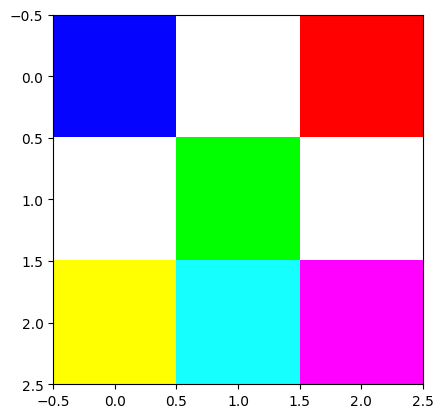

IMAGEM RGB


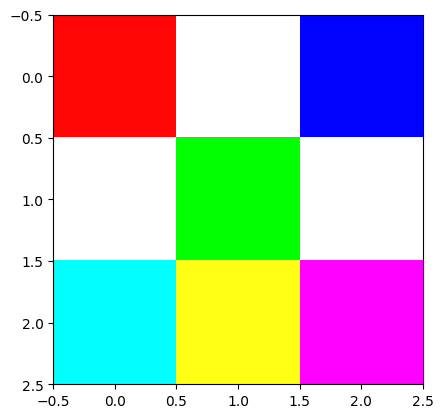

Tamanhos da imagem:  (3, 3, 3)
Altura:  3
Largura:  3
Camadas de cores:  3
Dimensões da imagem: 
 [[[255   5   5]
  [255 255 255]
  [  1   1 255]]

 [[255 255 255]
  [  1 255   1]
  [255 255 255]]

 [[  2 255 255]
  [255 255  21]
  [255   1 255]]]


In [52]:
#Imagem crua
print("IMAGEM CRUA")
image2 = cv2.imread("Aula 1302/img3x3.png")
plt.imshow(image2)
plt.show()

#Imagem RGB
print("IMAGEM RGB")
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2_rgb)
# plt.axis('off')
plt.show()

#Dimenssões
print("Tamanhos da imagem: ", image2_rgb.shape)
print("Altura: ", image2_rgb.shape[0])
print("Largura: ", image2_rgb.shape[1])
print("Camadas de cores: ", image2_rgb.shape[2])
print("Dimensões da imagem: \n", image2_rgb)

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

In [41]:
# import os
# print(os.path.exists("Aula 1302/img3x3.png"))

True


## Imagem em tons de cinza

Em muitos casos trabalhamos com imagens na escala de cinza, logo, a imagem possui apenas 1 canal de cor.

Temos com isso vantagem pq a imagem fica mais leve

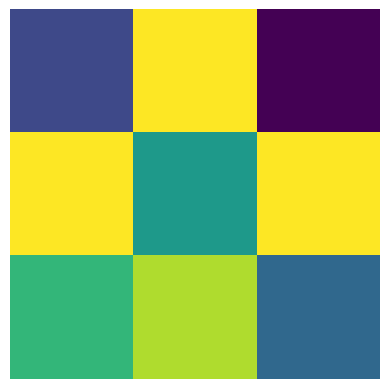

array([[ 79, 255,  29],
       [255, 150, 255],
       [179, 228, 105]], dtype=uint8)

In [47]:
import cv2
import numpy as np

from matplotlib import pyplot as plt


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("Aula 1302/img3x3.png", cv2.IMREAD_GRAYSCALE)

# ou use o argumento 0, tem o mesmo efeito de importar na escala de cinza
#imagem_cinza = cv2.imread("img3x3.png", 0)

plt.imshow(imagem_cinza)

plt.axis('off') 
plt.show()
imagem_cinza


visualmente a imagem não sai cinza de cara, esse é o default da biblioteca (default é o cmap --> viridis)
para de fato trabalhar na escala de cinza é feito a correção ---> cmap="gray"

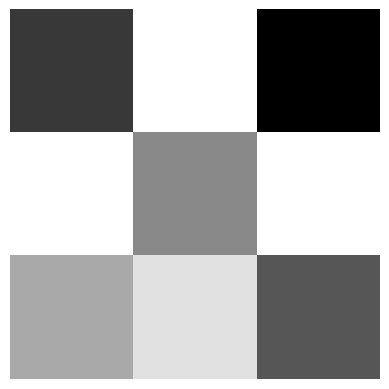

[[ 79 255  29]
 [255 150 255]
 [179 228 105]]


In [48]:
plt.imshow(imagem_cinza, cmap="gray")

plt.axis('off')
plt.show()
print(imagem_cinza)

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 2

Eita! alguma está errada nesse plot, era esperado uma imagem na escala de cinza. Por que apareceu isso, como corrigir?

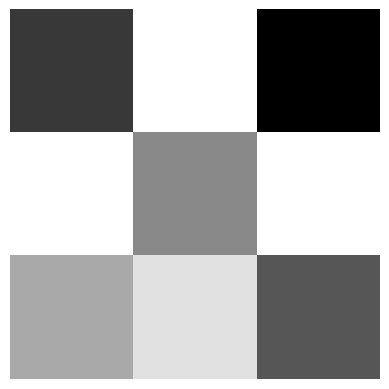

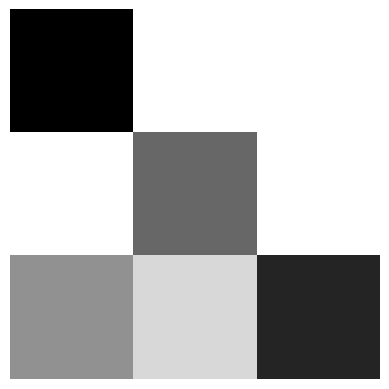

In [62]:
import cv2
import numpy as np

from matplotlib import pyplot as plt


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("Aula 1302/img3x3.png", 0)

plt.imshow(imagem_cinza, cmap='gray')

plt.axis('off')
plt.show()
imagem_cinza


imagem_cinza[0,2] = 255
plt.imshow(imagem_cinza, cmap='gray')
plt.axis('off')
plt.show()

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Amostragem da imagem

As imagens capturadas por dispositivos digitais possuem as características de resolução espacial e resolução de cores
Enquanto a resolução de cores afeta o número de cores que podem serr epresentadas na imagem, sua resolução espacial afeta o tamanho que a imagem irá ter. Embora não se possa comparar diretamente a resolução de duas imagens com tamanhos diferentes, a imagem do mesmo objeto, se possui mais pixels, significará que tamém possui maior resolução

### Alterando o tamanho de uma imagem

O redimensionamento da imagem pode ser feito na OpenCV através do comando `cv2.resize(imagem, tamanho, interpolação)`

O tamanho é dado por uma tupla (W,H), onde W é a largura (número de colunas) e H é a altura (número de linhas)

Dimensões da imagem:  (768, 1024, 3)


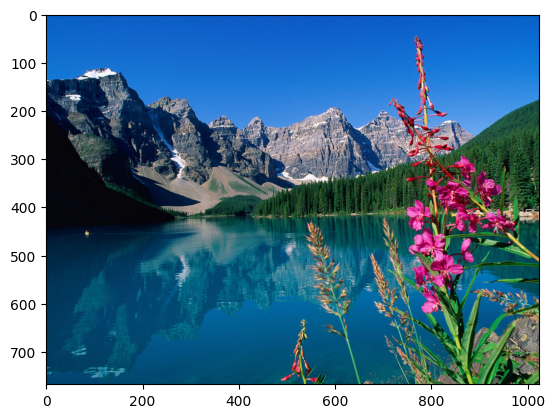

Novas dimensões da imagem:  (400, 600, 3)


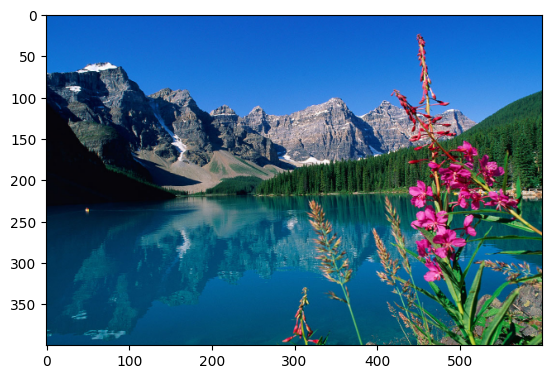

In [67]:
# Carregando a imagem na versão colorida de um arquivo
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread("Aula 1302/NATUREZA_1.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print("Dimensões da imagem: ", image.shape)
plt.imshow(image)
plt.show()

imagem2 = cv2.resize(image, (600,400), cv2.INTER_LINEAR)
print("Novas dimensões da imagem: ", imagem2.shape)


plt.imshow(imagem2)
plt.show()

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 3

Comparar os diferentes métodos de interpolação (vizinho mais próximo, bilinear e bicúbica) ao ampliarmos uma imagem em 10 vezes seu tamanho. Escolha uma imagem pequena.  

Dica de onde encontrar na documentação as flags de interpolação:
https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

Para saber mais sobre interpolação, sugiro assistir ao video: https://www.youtube.com/watch?v=8bTDssnJyZc&ab_channel=S.M.RiazulIslam

In [ ]:
#Implemente aqui sua solução............












# Dica para imprimir varias imagens de forma mais organizada com o matplotlib

#plt.figure(figsize = (20,20))
#plt.subplot(1, 2, 1);plt.imshow(img)
#plt.subplot(1, 2, 2);plt.imshow(img2)
#plt.show()

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Alterando os valores dos pixels de uma imagem

### Range de valores

Antes de alterar os valores dos pixels temos que entender que a OpenCV trabalha com valores de 8 bits para cada componente de cor ou escala de cinza, quer dizer que os valores possiveis estão no range entre **0** e **2⁸-1**, que é a mesma que dizer entre **0 e 255**.

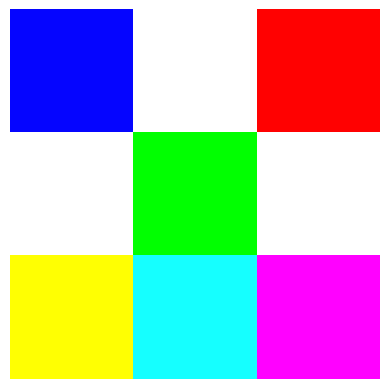

In [70]:
import cv2
import numpy as np


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("Aula 1302/img3x3.png", cv2.IMREAD_COLOR)

plt.imshow(imagem_cinza)

plt.axis('off')
plt.show()

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 4

Implemente um codigo que faz a alteração do pixel(0,0) para a a cor Magenta - RGB (255,0,255);

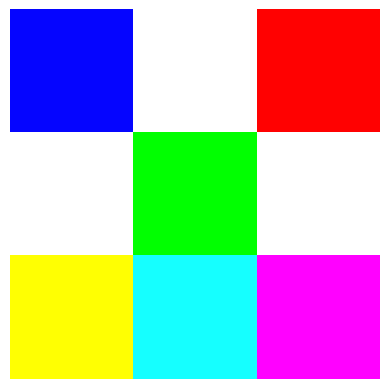

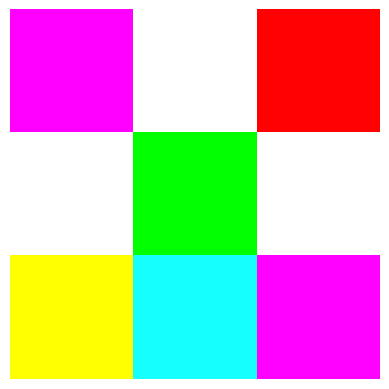

In [72]:
imagem_cinza = cv2.imread("Aula 1302/img3x3.png", cv2.IMREAD_COLOR)

plt.imshow(imagem_cinza)
plt.axis('off')
plt.show()

imagem_cinza[0,0] = (255,0,255)

plt.imshow(imagem_cinza)
plt.axis('off')
plt.show()

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 5

![](https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab01/letra.png?raw=1)

Crie uma array de zero com 8 linhas e 5 colunas. E escreva (desenhe) a primeira letra do seu nome ou grupo.

Plot a imagem para visualizar o resultado.

Dica: Use np.zeros() para criar o array, para facilitar faça em escala de cinza onde o valor de intensidade do pixel 0=branco e 255=preto.

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

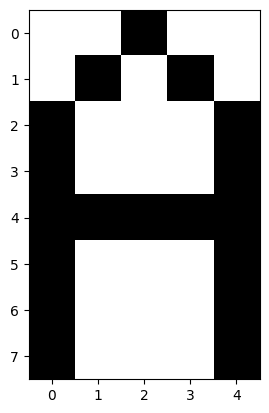

In [73]:
# Começamos importanto as bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Criamos o array de zero 3x3
letra = np.zeros((8,5), dtype=int)
letra2 = np.zeros((8,5), dtype=int)

# implemente aqui o seu código.........
letra[0,0] = 255
letra[0,1] = 255
letra[0,3] = 255
letra[0,4] = 255
letra[1,0] = 255
letra[1,2] = 255
letra[1,4] = 255
letra[2,1] = 255
letra[2,2] = 255
letra[2,3] = 255
letra[3,1] = 255
letra[3,2] = 255
letra[3,3] = 255
letra[5,1] = 255
letra[5,2] = 255
letra[5,3] = 255
letra[6,1] = 255
letra[6,2] = 255
letra[6,3] = 255
letra[7,1] = 255
letra[7,2] = 255
letra[7,3] = 255

# letra2[0,3] = 255
# letra2[0,4] = 255
# letra2[1,1] = 255
# letra2[1,2] = 255
# letra2[1,4] = 255
# letra2[2,1] = 255
# letra2[2,2] = 255
# letra2[2,4] = 255
# letra2[3,1] = 255
# letra2[3,2] = 255
# letra2[3,4] = 255
# letra2[4,3] = 255
# letra2[4,4] = 255




# Plota resultado

plt.imshow(letra, cmap = "gray")
# plt.imshow(letra2, cmap = "gray")

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Varredura de uma imagem

Desenvolver uma rotina capaz de varrer sua imagem pixel a pixel é muito mais interessante para aplicações mais práticas, embora exista tecnicas mais otimizadas e rápidas para essa aplicação, podemos utilizar uma estrutura de dois laços For para passar sobre todas as linhas e todas as colunas da matriz (imagem).

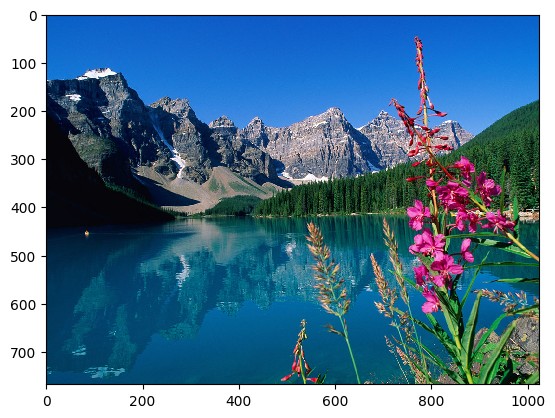

In [74]:
import cv2
imagem = cv2.imread("Aula 1302/NATUREZA_1.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    #image[y, x] = (255,0,0) #sobreescrevendo todos os pixels da imagem para a cor vermelha
    pass
plt.imshow(image, interpolation="none")
plt.show()

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 6

Utilizando a técnica dos 2 for, implemente uma função que desenha um linha branca na vertical no centro da imagem de largura 50 pixeis.
Dica: use um if para checar a posição (x,y) antes de pintar de branco o pixel.

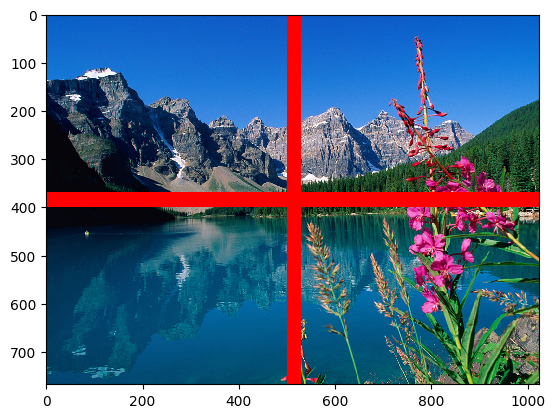

Quantidade de linhas:  768
Quantidade de colunas: 512 1024


In [81]:
### seu código aqui

import cv2
imagem = cv2.imread("Aula 1302/NATUREZA_1.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

altura = image.shape[0]//2
largura = (image.shape[1]//2)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    #image[y, x] = (255,0,0) #sobreescrevendo todos os pixels da imagem para a cor vermelha
    if (y in range(370,400) or x in range(500,530)):
    # if(y == altura or x == largura):
      image[y, x] = (255,0,0)
    pass
plt.imshow(image, interpolation="none")
plt.show()
print("Quantidade de linhas: ", image.shape[0])
print("Quantidade de colunas: 512", image.shape[1])

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════